# 자연어 처리

- Natural Language 자연어 : 사람들이 일상적(구어체,문어체)으로 사용하는 언어
- Natural Language Preprocessing 자연어 처리: 컴퓨터가 자연어를 이해하거나 생성할 수 있도록 데이터를 처리하는 기술

- 컴퓨터 관점에서 자연어 처리의 과정
    - 언어 -> 컴퓨터 : 컴퓨터가 사람의 언어를 이해하는 과정(NLU)
    - 컴퓨터 -> 언어 : 컴퓨터가 사람의 언어를 사용하는 과정(NLG)
    
- 전산언어학 (Computational Linguistics)
    - 컴퓨팅 기술을 언어학에 활용하는 분야
    - 컴퓨터 공학 + 언어학 + 통계학
    
    - 각 국가의 언어적 특성이 모두 다름
    - 음성 인식 시스템 (STT, Speech To Text) : 동의어 / 맥락 / 흐름에 따라 해석이 달라짐
    - "물이 있다" -> [물이 있다] / [무리있다]
    
- 어려운 이유 :
    - 1. 언어의 중의성 (참 잘~한다) -> 긍정적 / 부정적의도 해석
    - 2. 규칙 예외 -> 표준화된 언어 규칙을 벗어나는 경우
    - 3. 유연함 및 확장 가능성 -> 유행어 / 관행적 표현
    
- 언어처리에서 패러다임 변화
    - 1. 규칙 기반 : 사전의 정의된 문법저 규칙을 이용해 사람의 언어를 처리
        -> 언어의 중의성 / 규칙 예외 등으로 한계
    - 2. 통계 기반 : 조건부 확률을 이용해, 문장에 오는 단어들의 순서의 확률 값을 분석하여 단어 사용의 빈도, 맥락 파악 등의 여러가지 기술이 전개
        -> 대량의 문장 분석이나 중의적 의도 파악 등에 대한 한계
    - 3. 기계 학습 기반 (텍스트 마이닝) : 전수 조사 중심의 학습 체계를 통한 텍스트 마이닝 기술 (텍스트 분류/ 유사도 분석)이 전개
    - 4. 신경망 알고리즘 기반 : 대량의 문장 분석 , 의도파악 뿐만 아닌 자연어 생성과 같은 기술들이 전개 (기계번역, 대화)

# 자연어 처리 연산

- Edit Distance : 2개의 객체(단어)가 얼마나 다른지 숫자로 나타내는 척도
     - Cat / Hat : 1
     - 단어의 유사성을 파악할 때 사용
     
- Stemming : 어간 추출, 단어의 본래 형태를 추출
    - going -> go  / Computer -> Compute
    - 문장의 의도를 파악하기 위한 처리
    
- Lemmatization : 표제어(lemma)를 찾는 작업(문장 내에서 표제어를 찾는 연산)
    - 문장의 의도를 파악 / 단어의 유사성 파악

In [1]:
# NLTK (Natural Language Toolkit) : 영어의 기호 및 통계기반 자연어처리 라이브러리
import nltk

In [2]:
# Edit Distance
from nltk.metrics import edit_distance

In [4]:
edit_distance("cat", "hat") # 두 단어의 차이?간격? 보여줌

1

In [5]:
# Stemming
from nltk.stem import PorterStemmer

In [6]:
pst = PorterStemmer()
pst.stem('Computer')

'comput'

In [8]:
pst.stem('go')
# 컴퓨터가 단어의 원형을 처리하는 '사전'을 라이브러리가 가지고 있음

'go'

In [9]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
from nltk import WordNetLemmatizer

In [12]:
wlem = WordNetLemmatizer()
wlem.lemmatize('ate', pos='v')

'eat'

# 형태소 분석과 개체명 인식

- 1. 형태소 분석 (형태소 POS, Part Of Speech, 가장 작은 말의 단위)
    - Morphological Analysis
    - 문장을 최소 단위, 형태소 단위로 나누어 품사를 부착하는 분석
    - Tokenizing + Tagging 작업이 수행된다.

- 2. Tokenizing : 텍스트에 대해 특정 단위로 문장을 나누는 것
    - 1) 어절 분리 (Word Separation) : 문장을 단어단위로 분리
    - 2) 문장 분리 (Sentence Separation) : 문단, 글을 문장 단위로 분리
- 3. Tagging : 나눠진 객체에 항목을 부여 (품사를 부착하는 작업)
- 4. 개체명 인식 (Named-Entity Recognition)
    - 특정 명사에 대해 사람/조직/장소 등을 구분하여, 문장의 맥락을 이해, 동의어 구분 등을 수행
    - Named-Entity (개체명) : 사람/조직/장소 등을 가진 단어

In [14]:
# 형태소 분석
text1 = "Show me the Money"
# 토크나이징 (어절분리)
token1 = nltk.word_tokenize(text1)
print(token1)
# 태깅 (Tagging)
nltk.pos_tag(token1)

['Show', 'me', 'the', 'Money']


[('Show', 'VB'), ('me', 'PRP'), ('the', 'DT'), ('Money', 'NNP')]

In [17]:
#pip install svgling

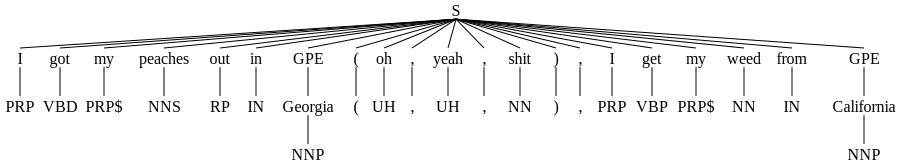

In [18]:
# 개체명 인식 (NER)
text2 = """I got my peaches out in Georgia (oh, yeah, shit) ,
I get my weed from California"""

# 어절분리
token2 = nltk.word_tokenize(text2)
# 태깅
tag1 = nltk.pos_tag(token2)
# 개체명 인식
nltk.chunk.ne_chunk(tag1)

# 불용어 처리

- Stopword(불용어) : 관사/전치사/조사/접속사 등 의미가 없는 단어
- 문장을 검색할 때, 분해할 때, 빈도수 파악, 의미 파악, 텍스트 분류 등에서 불용어를 처리해야만 원할한 분석

In [19]:
from nltk.corpus import stopwords

In [20]:
# 불용어 사전을 구성
stop1 = set(stopwords.words('english'))

In [21]:
text3 = '''Smooth like butter,
like a criminal undercover Gon pop like trouble breaking into your heart'''

# 토크나이징
token3 = nltk.word_tokenize(text3)

In [25]:
clean_list = []
for i in token3:
    # len(i.lower) > 1 : 특수기호를 제외하기 위한 조건
    # i.lower() not in stop1 : 불용어가 아닌 글자들을 추출하는 조건
    if (len(i.lower()) > 1) and (i.lower() not in stop1):
        clean_list.append(i)

In [26]:
clean_list

['Smooth',
 'like',
 'butter',
 'like',
 'criminal',
 'undercover',
 'Gon',
 'pop',
 'like',
 'trouble',
 'breaking',
 'heart']

# 한국어 자연어 처리
- koNLPy

In [27]:
import konlpy

- Okt (Open Korean Text) : Python 기반의 형태소 분석기
    - 과거에 트위터에 올라온 글들을 이용해 형태소 분석기를 구성
    - 구어체(말할 때 사용하는 어체)에 적절하게 사용
    - 딥러닝 알고리즘을 사용하여 품사 부착
    - 다른 형태소 분석기에 비해 속도가 빠름
- KKma : Java 기반의 형태소 분석기
    - 규칙 기반 형태소 분석기
    - 속도가 비교적 느림
    - 형태소 분석 및 구분 분석에서 복잡한 문장의 원형을 찾고자 할 때
- Komoran : Java 기반의 형태소 분석기
    - 머신러닝 알고리즘 기반의 형태소 분석기
    - 공백이 포함된 고유명사 잘 분류한다
    - 다른 형태소 분석기와 다르게 여러 어절을 하나의 품사로 분석이 가능
- Mecab : 일본어 형태소 분석을 목적으로 개발
    - 한국어에서 처리 가능한 형태로 개발
    - 자연어 처리 초장기에 형태소 분석기나 자연어 처리 기법 개발에 많이 사용
- Hannanum : Java 기반의 형태소 분석기
    - 규칙 기반의 형태소 분석기

In [28]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

In [29]:
okt = Okt()

In [30]:
text4 = '호의가 계속되면 그게 권리인줄 알아요'

#형태소 분석(토큰화)
okt.morphs(text4, stem=True)

['호의', '가', '계속', '되다', '그게', '권리', '인', '줄', '알다']

In [31]:
text5 = """싸늘하다. 가슴에 비수가 날아와 꽂힌다.
하지만 걱정하지 마라. 손은 눈보다 빠르니까"""

okt.nouns(text5)

['가슴', '비수', '걱정', '손', '눈']

In [33]:
okt.phrases(text5) # 두 글자 이상의 어절 (문장을 구로 나누어) 추출

['가슴', '비수', '걱정']

In [34]:
text6 = """맷돌 손잡이를 어이라 그래요 어이.
맷돌에 뭘 갈려고 집어놓고 맷돌을 돌리려고 하는데 손잡이가 빠졌네?
으이읍네?"""

In [35]:
# 다른 형태소 분석기들과 비교
kkma = Kkma()
komoran = Komoran()
han = Hannanum()

In [36]:
print('Okt', okt.morphs(text6))
print('KKMA', kkma.morphs(text6))
print('Komoran', komoran.morphs(text6))
print('Hannanum', han.morphs(text6))

Okt ['맷돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.', '\n', '맷돌', '에', '뭘', '갈려고', '집어놓고', '맷돌', '을', '돌리려고', '하는데', '손잡이', '가', '빠졌네', '?', '\n', '으이', '읍', '네', '?']
KKMA ['맷돌', '손잡이', '를', '어이', '라', '그리하', '여요', '어이', '.', '맷돌', '에', '무엇', '을', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', '는데', '손잡이', '가', '빠지', '었', '네', '?', '으', '이', '읍', '네', '?']
Komoran ['맷돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.', '맷돌', '에', '뭘', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', '는데', '손잡이', '가', '빠지', '었', '네', '?', '으', '잇', 'ㅂ네', '?']
Hannanum ['맷돌', '손잡이', '를', '어이', '이', '라', '그렇', '어', '요', '어이', '.', '맷돌', '에', '뭐', '을', '갈', '려고', '집', '어', '놓', '고', '맷돌', '을', '돌리', '려고', '하', 'ㄴ데', '손잡이', '가', '빠지', '었네', '?', '으이읍네', '?']


# 단어 표현

- 언어적 특성을 활용해 단어를 수치화하여, 컴퓨터가 이해할 수 있는 형태로 변환
- Word Embedding 또는 Word Vector로 표현
- 통계 기반의 자연어 처리를 하는데 근간이 되는 분석 기법
- 텍스트 마이닝의 선행 단계 (텍스트 분류, 유사도 분석)

# One Hot Encoding

- 문장의 모든 단어를 0 또는 1의 값으로 변환
- 각 단어를 Index로 만들어서, 문장 내 해당 단어가 등장하면, Index 값에 1/ 등장하지 않으면 0으로 변환
- 장점:
    - 방법 자체가 매우 간단함
    - 컴퓨터나 사람이 이해하기 쉽다
- 단점:
    - 대량의 Text를 분석하는 경우, 단어가 매우 많아 Vector의 크기가 매우 커짐(비효율적)
    - 벡터 자체에 단어의 의마나 특성같은 것은 전혀 표현되지 않음
    - 단어의 순서가 나타나지 않음

In [37]:
text7="""그대 기억이 지난 사랑이 내 안을 파고드는 가시가 되어.
제발 가라고 흐아주 가라고"""

In [38]:
import pandas as pd

In [40]:
df_text = pd.DataFrame(okt.pos(text7), columns=['단어','품사'])

In [42]:
pd.get_dummies(df_text['단어'])

,\n,.,가,가라,가시,고,그대,기억,내,되어,사랑,아주,안,을,이,제발,지난,파고드는,흐
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


# Continuous Bag of Words(CBOW)

- 문서 내의 모든 단어를 모아놓고 단어에 대한 빈도수를 바탕으로, 특정 문장 내에 특정 단어가 몇번 출현했는지를 추출
- 장점:
    - 매우 직관적
    - 넓은 범위의 (비교적 긴 문장)에서 사용이 가능하고, 쉽고 빠른 구성 가능
    - 문장의 특성을 보다 잘 나타낼 수 있음
- 단점:
    - Semantic Context : 문장 내 단어의 문맥적 의미를 반영하기 어려움
        - 단어의 등장 순서를 고려하지 않기 때문
    - (Sparse Matrix 현상) 분석하는 문단 내 범ㅇㅇ적으로 사용되는 단어가 아닌 경우, 공백의 Matrix가 매우 많아지는 현상(매우 많은 Columns이 생성 -> 비효율적 처리)
    - 대부분의 행렬이 0값으로 표현
    - 텍스트 마이닝에서 성능 저조

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
text8 = """너와 함께 한 시간 모두 눈부셨다.
날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다.
그리고 무슨일이 벌어져도 니 잘못이 아니다."""

In [45]:
sent1 = kkma.sentences(text8)
sent1

['너와 함께 한 시간 모두 눈부셨다.',
 '날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다.',
 '그리고 무슨 일이 벌어져도 니 잘못이 아니다.']

In [49]:
sent1 = text8.split('\n') # kkma 안될때 -> 걍 split으로

In [50]:
vector_model1 = CountVectorizer()
x = vector_model1.fit_transform(sent1)

In [51]:
x.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]])

In [53]:
pd.DataFrame(data=x.toarray(), columns=vector_model1.get_feature_names_out())

,그리고,날이,너와,눈부셨다,모두,모든,무슨일이,벌어져도,시간,아니다,않아서,잘못이,적당해서,좋아서,좋았다,좋지,함께
0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,4,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0
2,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0


# Skip-Gram

- 중심 단어로부터 주변단어를 예측, 주어진 단어로부터 그 주변에 위치한 단어들이 확률적으로 등장할 값을 계산 단어를 표현
- 장점:
    - 의미론적 관계 학습 : 단어 간의 복잡한 의미를 도출할 수 있음
    - 드물게 나타나는 단어도 확률값으로 표현해 처리되기 때문에, 단어 표현에 있어 효율성을 가져가면서, 드물에 등장하는 단어도 효과적으로 표현이 가능

In [54]:
from gensim.models import Word2Vec

In [65]:
text9 = """왜 또 아픈 상처에 소금을 뿌리십니까?
제게도 꿈은 있었습니다.
전 있잖아요. 국문학과를 가고 싶었어요.
가야 할 때가 언제인가를 분명히 알고 가는이의 뒷모습은 얼마나 아름다운가.
봄 한 철 경정을 인내한 나의 사랑은 지고 있다
분분한 낙화
한 잔은 떠나간 너를 위하여,
한 잔은 너와 나의 영원했던 사랑을 위하여,
한 잔은 이미 초라해진 나를 위하여,
그리고 마지막 한 잔은 미리 알고 정하신 신을 위하여
-낭만 어부"""

In [66]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [67]:
# 띄어쓰기를 기준으로 문장을 분할 -> 문장 내 단어를 각각의 토큰으로 분할
sent2 = [word_tokenize(x) for x in sent_tokenize(text9)]

In [68]:
model = Word2Vec(sent2, vector_size=100, window=3, min_count=1, sg=1)
# vector_size = : 학습된 단어의 벡터 차원 수를 결정
# window= : 모델이 학습될 때, 고려되는 컨텍스트 크기
# 중심 단어를 기준으로 좌.우 몇 개 단어를 컨텍스트로 볼 지 결정
# min_count= : 학습에 포함시킬 최소 단어 빈도수
# sg=1 : Skip-Gram 으로 학습을 수행

In [71]:
# 단어 간 유사도를 계산
model.wv.similarity('위하여','나의')
# 두 단어의 코사인 유사도를 계산해 출력
# +1 : 두 단어가 매우 유사하고 관련이 깊다 (승용차 - 자동차)
# 0 : 두 단어가 서로 상관이 없다 (맥락 없다)
# -1 : 두 단어가 서로 반대되는 관계에 있다
#      (맥락적으로 반대되는 의미의 단어도 문장 내에서 같이 등장하는 경우가 많아
#       이론적으로만 접근)

0.05278936

# 개별미션
- 아래의 미션을 Jupyter Notebook으로 풀이 후, [File] - [Download as]에 [HTML (.html] 로 저장하여 메일로 송부해주세요.
- 제출 양식 : [하나은행_데이터] 홍길동_개별 미션 (12주차 1일)

In [72]:
import pandas as pd

1. '31_Data.xlsx' 데이터를 아래와 같이 바꾸어 처리하시오. (Row 7725 / Column 6)

In [100]:
df1 = pd.read_excel('31_Data.xlsx')

In [109]:
df1['항목'] = '지속강화해야할항목'

In [102]:
df1.columns

Index(['관계', '지속강화해야할행동', '현재하고있지않지만해야할행동', '더이상하지말아야할행동', '직종', '임원추천여부',
       '항목'],
      dtype='object')

In [103]:
df1 = df1.rename(columns={'지속강화해야할행동': 'TEXT'})

In [104]:
df1['사람 ID'] = df1.index
df1

,관계,TEXT,현재하고있지않지만해야할행동,더이상하지말아야할행동,직종,임원추천여부,항목,사람 ID
0,타인,-Very Supportive\n-Highly encouraging,- More Communication with team members,-None,경영/기획/컨설팅,추천,-Very Supportive\n-Highly encouraging,0
1,타인,Socializing and Networking with all employees ...,Provide a System for further development,Nothing to rCQBort,경영/기획/컨설팅,추천,Socializing and Networking with all employees ...,1
2,타인,no comment,Mr. Thiemig should be more time in 전술전략기획부 and...,Not be on site at 전술전략기획부. Frequently attendan...,인사/총무,비추천,no comment,2
3,타인,Employee motivation can be reinforced. \nEmplo...,There is no contact between Director and Empl...,Nothing to add.,전문직,추천,Employee motivation can be reinforced. \nEmplo...,3
4,타인,"counter-intelligence및 본사와의 협업 강화,\n매 해 전략및 본연의...","조직원이 각자 맡은바 업무에 몰두할 수 있는 환경및 전략, 정기적인 현재 회사나 조...","HQ로 부터 업무는 받을 때, 조직의 역량이 가능한지 먼저 확인이 필요핟.",경영/기획/컨설팅,추천,"counter-intelligence및 본사와의 협업 강화,\n매 해 전략및 본연의...",4
...,...,...,...,...,...,...,...,...
2570,타인,업무 연관성이 높은 팀들(구매/SQM)과의 교류를 통해 조직간 업무 효율성을 높일 ...,업무 우선 순위에 따라 논의 및 처리방안을 함께 좀더 고민해 주셨으면 좋겠습니다.\n,없습니다.,마케팅/시장조사,비추천,업무 연관성이 높은 팀들(구매/SQM)과의 교류를 통해 조직간 업무 효율성을 높일 ...,2570
2571,타인,1. 상위자와 연결고리로써 지속적으로 소통을 할 수 있도록 지원.\n2. 업무에 대...,"타 팀과 비교하여 재택근무 등 유연적 실시 부족, 복지적 측면은 아니지만, 구성원의...",없음.,영업/제휴,추천,1. 상위자와 연결고리로써 지속적으로 소통을 할 수 있도록 지원.\n2. 업무에 대...,2571
2572,타인,항상 격려해주시고 잘한 부분은 칭찬해주시는 부분,-,-,디자인,비추천,항상 격려해주시고 잘한 부분은 칭찬해주시는 부분,2572
2573,타인,상생 활동의 지속적인 강화를 위해 수고 많으십니다.,특별한 의견 없습니다.,특별한 의견 없습니다.,영업/제휴,추천,상생 활동의 지속적인 강화를 위해 수고 많으십니다.,2573


In [111]:
col_list = ['사람 ID', '관계', '직종', '임원추천여부', '항목', 'TEXT']
df2 = df1[col_list]
df2.head(5)

,사람 ID,관계,직종,임원추천여부,항목,TEXT
0,0,타인,경영/기획/컨설팅,추천,지속강화해야할항목,-Very Supportive\n-Highly encouraging
1,1,타인,경영/기획/컨설팅,추천,지속강화해야할항목,Socializing and Networking with all employees ...
2,2,타인,인사/총무,비추천,지속강화해야할항목,no comment
3,3,타인,전문직,추천,지속강화해야할항목,Employee motivation can be reinforced. \nEmplo...
4,4,타인,경영/기획/컨설팅,추천,지속강화해야할항목,"counter-intelligence및 본사와의 협업 강화,\n매 해 전략및 본연의..."


----

2. '지속 강화 해야 할 행동'에서, 빈도수가 가장 높은 상위 20개의 명사를 추출하시오.

In [163]:
from konlpy.tag import Okt

In [164]:
okt = Okt()

In [166]:
# 결측값을 빈 문자열로 대체하여 처리
df2['TEXT'] = df2['TEXT'].fillna('')

/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_36038/2749251472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TEXT'] = df2['TEXT'].fillna('')


In [167]:
# 하나의 문자열로 합침
combined_text = ' '.join(df2['TEXT'])

In [168]:
nouns = okt.nouns(combined_text)

In [169]:
from collections import Counter
noun_counter = Counter(nouns)

In [170]:
noun_counter.most_common(20)

[('업무', 737),
 ('구성원', 435),
 ('및', 392),
 ('팀', 388),
 ('대한', 350),
 ('지속', 296),
 ('수', 247),
 ('제시', 215),
 ('것', 211),
 ('방향', 193),
 ('팀원', 180),
 ('의견', 150),
 ('조직', 146),
 ('생각', 140),
 ('진행', 133),
 ('위', 133),
 ('소통', 131),
 ('의사결정', 129),
 ('대해', 121),
 ('노력', 120)]

----

3. stopword.txt 파일을 불러와 해당 파일 내 단어들을 불용어로 처리해, 중간 관리자가 '현재 하고 있지 않지만 해야 할 행동'에 대한 명사 단어들에 대해 워드클라우드를 생성하시오.

In [129]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [130]:
with open('stopword.txt', 'r', encoding='utf-8') as f:
    stop_words = f.read().splitlines()

In [133]:
df1['현재하고있지않지만해야할행동'] = df1['현재하고있지않지만해야할행동'].fillna('')

In [135]:
combined_text2 = ' '.join(df1['현재하고있지않지만해야할행동'])

In [136]:
okt = Okt()

In [137]:
nouns2 = okt.nouns(combined_text2)

In [153]:
filtered_nouns = [noun for noun in nouns2 if noun not in stop_words]

In [154]:
noun_counter = Counter(filtered_nouns)

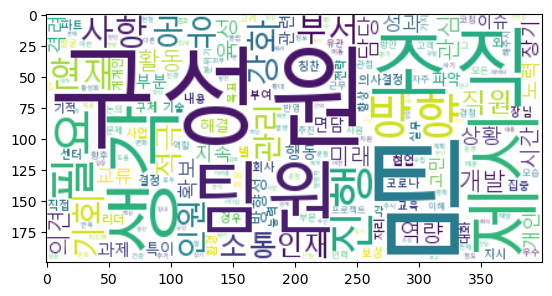

In [155]:
wordcloud = WordCloud(font_path='malgun.ttf',
                      background_color='white').generate_from_frequencies(noun_counter)

plt.imshow(wordcloud, interpolation='bilinear')

----

4. '직종'에서 '정책/전술'부서에 있는 인원들이 가장 많이 사용하는 TEXT 단어 표현을 10가지 뽑아 해당 빈도수에 대한 막대그래프를 시각화 하시오.

In [161]:
plt.rcParams['font.family'] = 'AppleGothic'

In [145]:
df2['직종'].unique()

array(['경영/기획/컨설팅', '인사/총무', '전문직', 'IT/인터넷', '유통/무역', '금융/재무', '디자인',
       '서비스/고객지원', '마케팅/시장조사', '영업/제휴', '생산관리/품질관리', '미디어/홍보', '기타',
       '기획/경영', '특수계층/공공', '개발', '데이터', '법률/법무', '연구개발', '교육', '정책/전술'],
      dtype=object)

In [148]:
df3 = df2[df2['직종'] == '정책/전술']

In [150]:
combined_text3 = ' '.join(df3['TEXT'])

In [151]:
nouns3 = okt.nouns(combined_text3)

In [156]:
noun_counter = Counter(nouns3)

In [158]:
top10_words = noun_counter.most_common(10)

<BarContainer object of 10 artists>

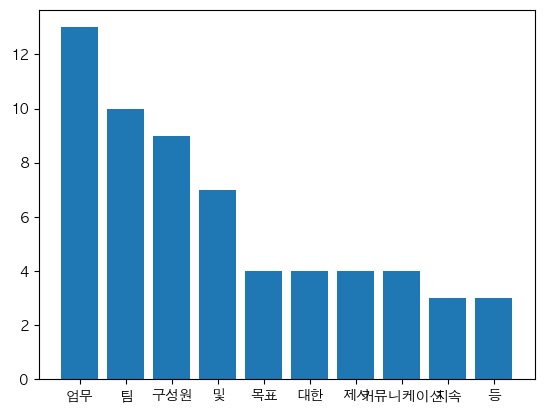

In [162]:
words, frequencies = zip(*top10_words)
plt.bar(words, frequencies)

----

5. '팀'과 '협업'이라는 단어가 각 임직원이 쓴 'TEXT'에 얼마나 등장하는지 계산하고, 어떤 직종에서 해당 단어를 가장 많이 사용했는지 확인하시오.

In [ ]:
df2['TEXT']

In [171]:
 noun_counter

Counter({'업무': 737,
         '구성원': 435,
         '및': 392,
         '팀': 388,
         '대한': 350,
         '지속': 296,
         '수': 247,
         '제시': 215,
         '것': 211,
         '방향': 193,
         '팀원': 180,
         '의견': 150,
         '조직': 146,
         '생각': 140,
         '진행': 133,
         '위': 133,
         '소통': 131,
         '의사결정': 129,
         '대해': 121,
         '노력': 120,
         '부분': 116,
         '강화': 114,
         '함': 108,
         '고객': 108,
         '격려': 97,
         '부서': 97,
         '점': 96,
         '역량': 95,
         '일': 93,
         '등': 92,
         '직원': 89,
         '관심': 89,
         '목표': 88,
         '협업': 87,
         '모습': 87,
         '방향성': 82,
         '현재': 79,
         '파악': 79,
         '해결': 77,
         '지금': 77,
         '위해': 75,
         '환경': 75,
         '적극': 74,
         '경청': 73,
         '활동': 70,
         '추진': 68,
         '개발': 68,
         '결정': 67,
         '행동': 67,
         '공유': 66,
         '관리': 66,
         '개선

In [172]:
noun_counter.get('팀', 0)

388

In [173]:
noun_counter.get('협업', 0)

87

In [176]:
# '팀'과 '협업' 단어의 등장 횟수를 계산하는 함수
def func5(text, word):
    return Counter(text.split())[word]

In [180]:
# 직종 별로 빈도수 계산 -> 각 직종헤서 '팀' 등장 횟수?
team = df2.groupby('직종')['TEXT'].apply(lambda x: func5(' '.join(x), '팀'))

In [181]:
colla = df2.groupby('직종')['TEXT'].apply(lambda x: func5(' '.join(x), '협업'))

In [182]:
team.idxmax()

'디자인'

In [183]:
colla.idxmax()

'IT/인터넷'